In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
wine = pd.read_csv("winequality-red.csv")
print("Successfully Imported Data!")
wine.head()

Successfully Imported Data!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
print(wine.shape)

(1599, 12)


In [21]:
wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [22]:
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [28]:
cor=wine.corr()

In [24]:
wine['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


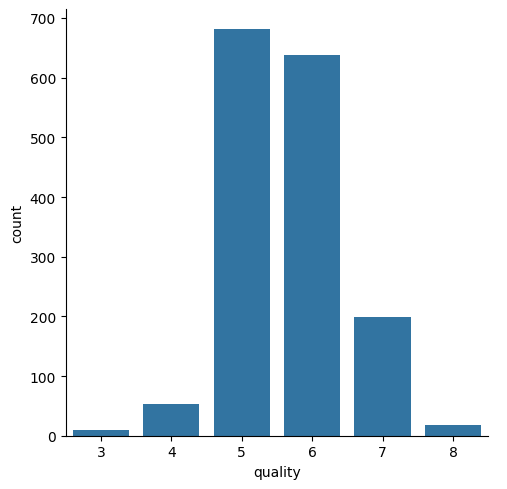

In [25]:
sns.catplot(x='quality', data=wine, kind= 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

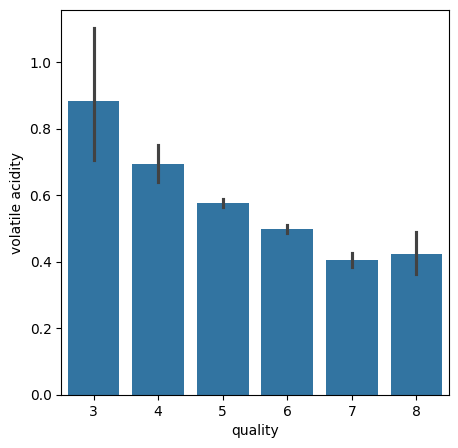

In [26]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine)

<Axes: xlabel='quality', ylabel='citric acid'>

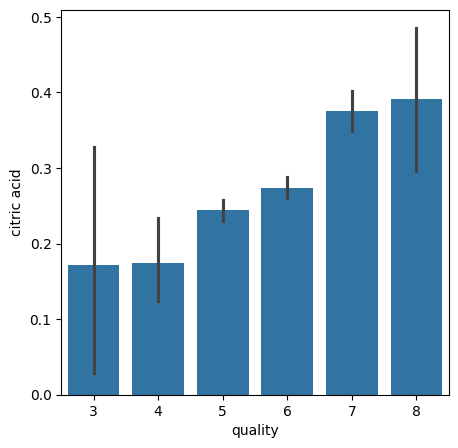

In [27]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine)

Histogram

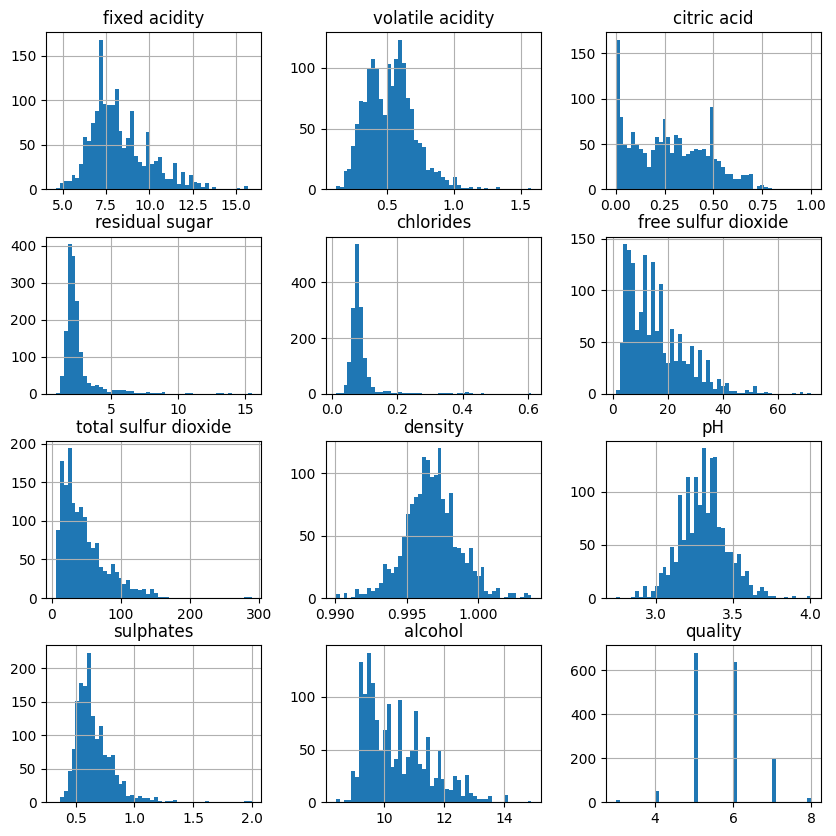

In [40]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

Violinplot

<Axes: xlabel='quality', ylabel='alcohol'>

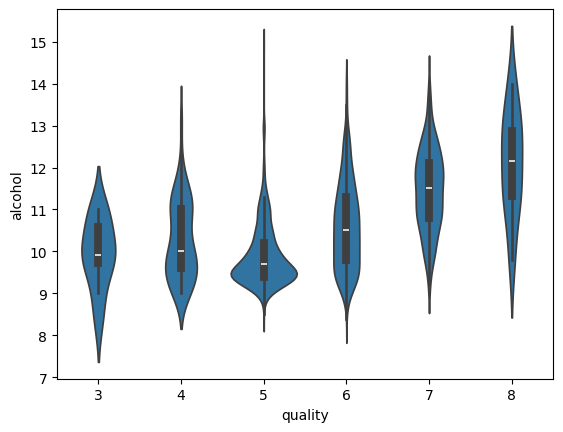

In [39]:
sns.violinplot(x='quality', y='alcohol', data=wine)

<Axes: >

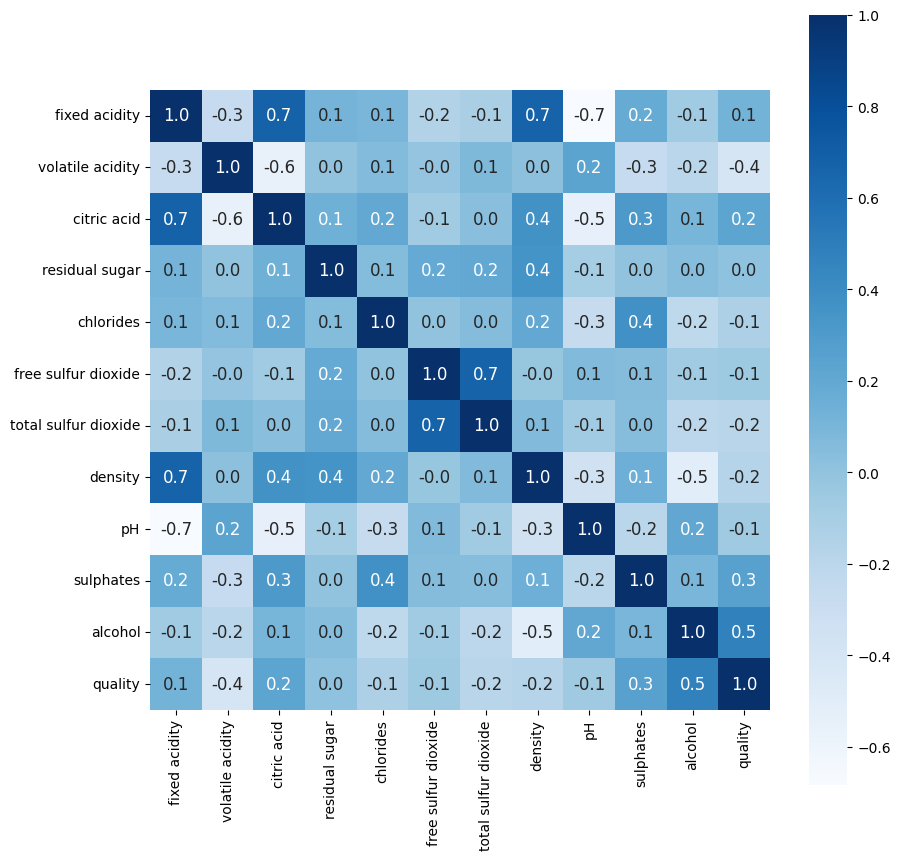

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(cor, cbar=True, square=True, fmt='.1f',
            annot=True, annot_kws={'size':12}, cmap='Blues')

Pair Plot

In [38]:
sns.pairplot(wine)

Output hidden; open in https://colab.research.google.com to view.

In [30]:
X = wine.drop('quality', axis=1)

In [31]:
Y = wine['quality'].apply(lambda y_value: 1 if y_value >= 6 else 0)

In [32]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


In [33]:
Y.value_counts()

,count
quality,
1,855
0,744


TRAIN TEST SPLIT

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Model

In [35]:
model = RandomForestClassifier()

In [36]:
model.fit(X_train, Y_train)


RandomForestClassifier()

Evaluation

In [43]:
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy Score training:",train_data_accuracy)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy Score testing:",test_data_accuracy)

Accuracy Score training: 1.0
Accuracy Score testing: 0.834375


USING KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score using KNN:",accuracy_score(Y_test,y_pred))

Accuracy Score using KNN: 0.678125


USING SVC

In [46]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score using SVC:",accuracy_score(Y_test,pred_y))

Accuracy Score using SVC: 0.6375


USING DECISION TREE

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score using Decision tree:",accuracy_score(Y_test,y_pred))

Accuracy Score using Decision tree: 0.75625


USING GaussianNB

In [48]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score using GaussianNB:",accuracy_score(Y_test,y_pred3))

Accuracy Score using GaussianNB: 0.721875


USING Xgboost

In [50]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score using Xgboost:",accuracy_score(Y_test,y_pred5))

Accuracy Score using Xgboost: 0.8


In [52]:
results = pd.DataFrame({
    'Model': ['KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.678,0.637,0.756,0.721,0.834,0.8]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.834,Random Forest
0.800,Xgboost
0.756,Decision Tree
0.721,GaussianNB
0.678,KNN
0.637,SVC
